# H03 - Pump failure data

_Adapted from Josep Fortiana (2023-05-15) by Jordi Abante (2024-05-06)_

In [3]:
#install.packages("bayesplot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(bayesplot,quietly=TRUE)

This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



# The pump failure dataset

Source: Gaver, D. P. & O'Muircheartaigh, I G. (1987). _Robust empirical Bayes analysis of event rates._ Technometrics 29, No. 1, pp. 1-15.

This is a very classical example in Bayesian modelling. It demonstrates hierarchical models and the need thereof.

Robert, Casella (2010), _Introducing Monte Carlo Methods with R,_ Chapter 7, Example 7.12: Gibbs sampling in the Pump failure dataset, pag. 222ff.

Number of failures observed and times of observation of ten pumps in a nuclear plant, with the data given in the following table:
	
$$
\begin{array}{l|cccccccccc}
	\hline
	\text{Pump}    &1		&2		&3		&4		&5		&6		&7		&8		&9		&10\\[0.25cm]
	\hline
	\text{Failures}&5		&1		&5		&14		&3		&19		&1		&1		&4		&22\\[0.25cm]
	\text{Time} &94.320 &15.720  &62.880  &125.760  &5.240  &31.440  &1.048 &1.048  &2.096 &10.480\\[0.25cm]
	\hline
\end{array}
$$



#### Data

In [4]:
x<-c(5, 1, 5, 14, 3, 19, 1, 1, 4, 22)
t<-c(94.320, 15.720, 62.880, 125.760, 5.240, 31.440, 1.048, 1.048, 2.096, 10.480)
n<-length(x)

# Frequentist treatment

Model assumes the number of failures of the $i$-th pump follows a Poisson process with parameter $\lambda_{i}$, $(1\leq i\leq n)$, $n=10$.

For an observation time $t_{i}$, the number of failures $X_{i}$ is thus a r.v.:

$$
    X_{i}\sim\operatorname{Poisson}(\lambda_{i}\cdot t_{i}),\mskip40mu 1\leq i\leq n.
$$



Either each pump has a different $\lambda_{i}$ parameter, $1\leq i\leq n=10$,

In [5]:
# Either each lambda.i is ML-estimated from a single observation as x.i/t.i
Individual.lambda.ML<-x/t
round(Individual.lambda.ML,3)

[1] 0.053 0.064 0.080 0.111 0.573 0.604 0.954 0.954 1.908 2.099

Or all pumps share the same $\lambda$ parameter, estimated as the average $\bar\lambda$ of the $n=10$ $\lambda_{i}$ values, $1\leq i\leq n$.

In [6]:
# or a common lambda is ML-estimated as the average of the above
mean.lambda.ML<-mean(Individual.lambda.ML)
round(mean.lambda.ML,3)

[1] 0.74

# Empirical Bayes

The **empirical Bayes** approach is to consider the $\lambda_{i}$ parameters as samples from a common _prior_ distribution.

This distribution is assumed to be a $\textrm{Gamma}(\alpha,\beta)$.

These parameters $\alpha$ and $\beta$ are obtained from the observed data (hence the **empirical** name).

Using the conjugate Gamma prior pdf for the Poisson likelihood, we get the model:

$$
    \begin{array}{clll}
        X_{i}      &\sim&\operatorname{Poisson}(\lambda_{i}\cdot t_{i}), &i=1,\dots,n,\\[0.35cm]
        \lambda_{i}&\sim&\operatorname{Gamma}(\alpha,\beta),              &i=1,\dots,n,
    \end{array}
$$

$\alpha$, $\beta$ are derived from the "observed" set of ML $\lambda$ estimates as follows:

A Gamma distribution with parameters $\alpha$ and $\beta$ has expectation and variance:

$$
    \mu=\dfrac{\alpha}{\beta},\mskip50mu \sigma^2=\dfrac{\alpha}{\beta^2}.
$$

Given $\mu$ and $\sigma^2$, we obtain:

$$
    \alpha=\dfrac{\mu^{2}}{\sigma^{2}},\mskip50mu \beta=\dfrac{\mu}{\sigma^{2}},
$$

then $\mu$ is estimated by the empirical mean $\bar{x}$ and $\sigma^{2}$ by the empirical variance.

The **empirical Bayes** procedure is to _"estimate"_ parameters in prior pdf's from data, either by ML or by the method of moments.

In [7]:
# We try the two possible candidates, corrected and uncorrected variance
var.tilde.lambda.ML<-var(Individual.lambda.ML)        # Corrected variance of "observed" lambdas 
writeLines(sprintf("Corrected   variance of the 'observed' lambdas = %4.3f",round(var.tilde.lambda.ML,3)))
var.lambda.ML<-(n-1)*var.tilde.lambda.ML/n             # Uncorrected variance of "observed" lambdas 
writeLines(sprintf("Uncorrected variance of the 'observed' lambdas = %4.3f",round(var.lambda.ML,3)))

Corrected   variance of the 'observed' lambdas = 0.568
Uncorrected variance of the 'observed' lambdas = 0.511


Here, we estimate $\alpha$ and $\beta$ in the prior $\operatorname{Gamma}(\alpha,\beta)$ from the empirical mean and variance of the $\lambda$'s.

In [8]:
alpha.tilde.hat<-(mean.lambda.ML)^2/var.tilde.lambda.ML
beta.tilde.hat<-mean.lambda.ML/var.tilde.lambda.ML
alpha.hat<-(mean.lambda.ML)^2/var.lambda.ML
beta.hat<-mean.lambda.ML/var.lambda.ML
c(round(alpha.tilde.hat,3),round(beta.tilde.hat,3))
c(round(alpha.hat,3),round(beta.hat,3))

[1] 0.964 1.303

[1] 1.071 1.448

## Posterior pdf with the empirical Bayes approach

Each $i$-th pump has a posterior pdf for $\lambda_{i}$, given its $t_{i}$ and the observed $x_{i}$. From the conjugate models formula:

$$
    \lambda_{i}\,|\,x_{i}\sim\operatorname{Gamma}(\widehat{\alpha}+x_{i},\widehat{\beta}+t_{i}).
$$

In [9]:
Empirical.alpha.post<-alpha.hat+x
Empirical.beta.post<-beta.hat+t
rbind(round(Empirical.alpha.post,3),round(Empirical.beta.post,3))

6.071,2.071,6.071,15.071,4.071,20.071,2.071,2.071,5.071,23.071
95.768,17.168,64.328,127.208,6.688,32.888,2.496,2.496,3.544,11.928


### Posterior expectations

In [10]:
Empirical.lambda.post.mean<-Empirical.alpha.post/Empirical.beta.post
str(Empirical.lambda.post.mean)
round(Empirical.lambda.post.mean,3)

 num [1:10] 0.0634 0.1207 0.0944 0.1185 0.6088 ...


[1] 0.063 0.121 0.094 0.118 0.609 0.610 0.830 0.830 1.431 1.934

### Posterior 90% credible intervals

In [11]:
round(rbind(qgamma(0.05,shape=Empirical.alpha.post,rate=Empirical.beta.post),qgamma(0.95,shape=Empirical.alpha.post,rate=Empirical.beta.post)),3)

0.028,0.022,0.041,0.073,0.211,0.405,0.154,0.154,0.569,1.323
0.111,0.283,0.165,0.173,1.175,0.850,1.947,1.947,2.611,2.641


### Posterior MAP estimates

Using that the mode of a Gamma distribution is $(\alpha-1)/\beta$

In [12]:
Empirical.lambda.post.MAP<-(Empirical.alpha.post-1)/Empirical.beta.post
round(Empirical.lambda.post.MAP,3)

[1] 0.053 0.062 0.079 0.111 0.459 0.580 0.429 0.429 1.149 1.850

## Full Bayesian hierarchical treatment

The modeling is based on the assumption that the number of failures of the $i$-th pump follows a Poisson process with parameter $\lambda_{i}$, $(1\leq i\leq 10)$.

For an observation time $t_{i}$, the number of failures $X_{i}$ is thus a $\textrm{Pois}(\lambda_{i}\cdot t_{i})$ random variable.

Each $\lambda_{i}$ is considered as a sample from a common $\textrm{Gamma}(\alpha,\beta)$.

In turn, $\beta$ is given a _hyperprior_ distribution $\textrm{Gamma}(\gamma,\delta)$.

$\alpha$, $\gamma$ and $\delta$ take constant values to be decided.  

Robert, Casella (2010) use $\alpha=1.8$, $\gamma=0.1$ and $\delta=1.0$ or $\delta=100.0$.

Thus we have a hierarchical model:

$$
    \begin{array}{clll}
    X_{i} &\sim&\textrm{Pois}(\lambda_{i}\cdot t_{i}),   \mskip50mu     &i=1,\dots,10,\\[0.35cm]
    \lambda_{i} &\sim&\textrm{Gamma}(\alpha,\beta),              &i=1,\dots,10,\\[0.35cm]
    \beta &\sim&\textrm{Gamma}(\gamma,\delta).
    \end{array}
$$

In the original paper where this data were first analyzed with a full Bayesian model:

Edward I. George, U. E. Makov and A. F. M. Smith (1993), _"Conjugate Likelihood Distributions"_   
Scandinavian Journal of Statistics, Vol. 20, No. 2 (1993), 147-156,

They use an exponential prior for $\alpha$, instead of a constant value:

$$
    \begin{array}{cll}
    \alpha &\sim&\operatorname{Exp}(\omega),
    \end{array}
$$

with parameter either $\omega=1.0$ or $\omega=1/100$.

**Note:** in the paper _Reader Reaction: A Re-Analysis of the Pump-Failure Data (with Response),_ by J. A. Nelder, E. I. George, U. E. Makov and A. F. M. Smith, Scandinavian Journal of Statistics, Vol. 21, No. 2 (Jun., 1994), pp. 187-191, they notice that pumps 1, 3, 4, and 6 were operated continuously, whereas the remaining ones were operated intermittently. Then they show that an improved fit is obtained when this difference is taken into account.

# Using Stan

In [36]:
#install.packages("ggplot2", repos= "https://cloud.r-project.org")
#install.packages("StanHeaders", repos= "https://cloud.r-project.org")
#install.packages("rstan", repos= "https://cloud.r-project.org")
require(rstan,quietly=TRUE)
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')


rstan version 2.26.13 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file


Attaching package: 'rstan'


The following object is masked from 'package:R2jags':

    traceplot


The following object is masked from 'package:coda':

    traceplot




## Data 

In [37]:
x<-c(5, 1, 5, 14, 3, 19, 1, 1, 4, 22)
t<-c(94.320, 15.720, 62.880, 125.760, 5.240, 31.440, 1.048, 1.048, 2.096, 10.480)
n<-length(x)

In [38]:
pumps.dataList<-list(
    x = x,
    t = t,
    n = n 
    )

### Specify model

In [39]:
pumps.modelString<-"
data {
  int<lower=0> n;
  int<lower=0> x[n];
  vector[n]  t;
}

parameters {
  real<lower=0> alpha;
  real<lower=0> beta;
  vector<lower=0>[n] lambda;
}

model {
  alpha ~ exponential(1.0);
  beta ~ gamma(0.1, 1.0);
  lambda ~ gamma(alpha, beta);
  x ~ poisson(lambda .* t);
}
" # close quote for modelString

Note the elementwise product in: `x ~ poisson(lambda .* t)`

### Translate model to C++ and compile to _Dynamic Shared Object (DSO)_

In [40]:
pumps.stanDso<-stan_model(model_code=pumps.modelString)

### Generate posterior sample

In [53]:
pumps.stanFit<-sampling(
        object=pumps.stanDso, 
        data = pumps.dataList, 
        chains = 4 ,
        iter = 5000 , 
        warmup = 1000 , 
        thin = 1
        )

In [54]:
S<-summary(pumps.stanFit)
round(S$summary,3)

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
alpha,0.697,0.003,0.274,0.288,0.501,0.655,0.847,1.338,10835.297,1
beta,0.930,0.005,0.549,0.186,0.533,0.826,1.208,2.297,10326.718,1
lambda[1],0.060,0.000,0.025,0.021,0.042,0.057,0.075,0.118,20779.346,1
lambda[2],0.101,0.001,0.080,0.008,0.043,0.082,0.137,0.306,21661.990,1
lambda[3],0.089,0.000,0.038,0.031,0.061,0.084,0.111,0.177,22446.510,1
lambda[4],0.116,0.000,0.030,0.065,0.094,0.113,0.135,0.182,21283.059,1
lambda[5],0.600,0.002,0.312,0.149,0.371,0.548,0.769,1.340,23054.610,1
lambda[6],0.608,0.001,0.139,0.369,0.510,0.597,0.696,0.907,20458.922,1
lambda[7],0.893,0.005,0.733,0.074,0.369,0.698,1.209,2.800,22326.440,1
lambda[8],0.890,0.005,0.743,0.071,0.362,0.692,1.195,2.834,22272.707,1


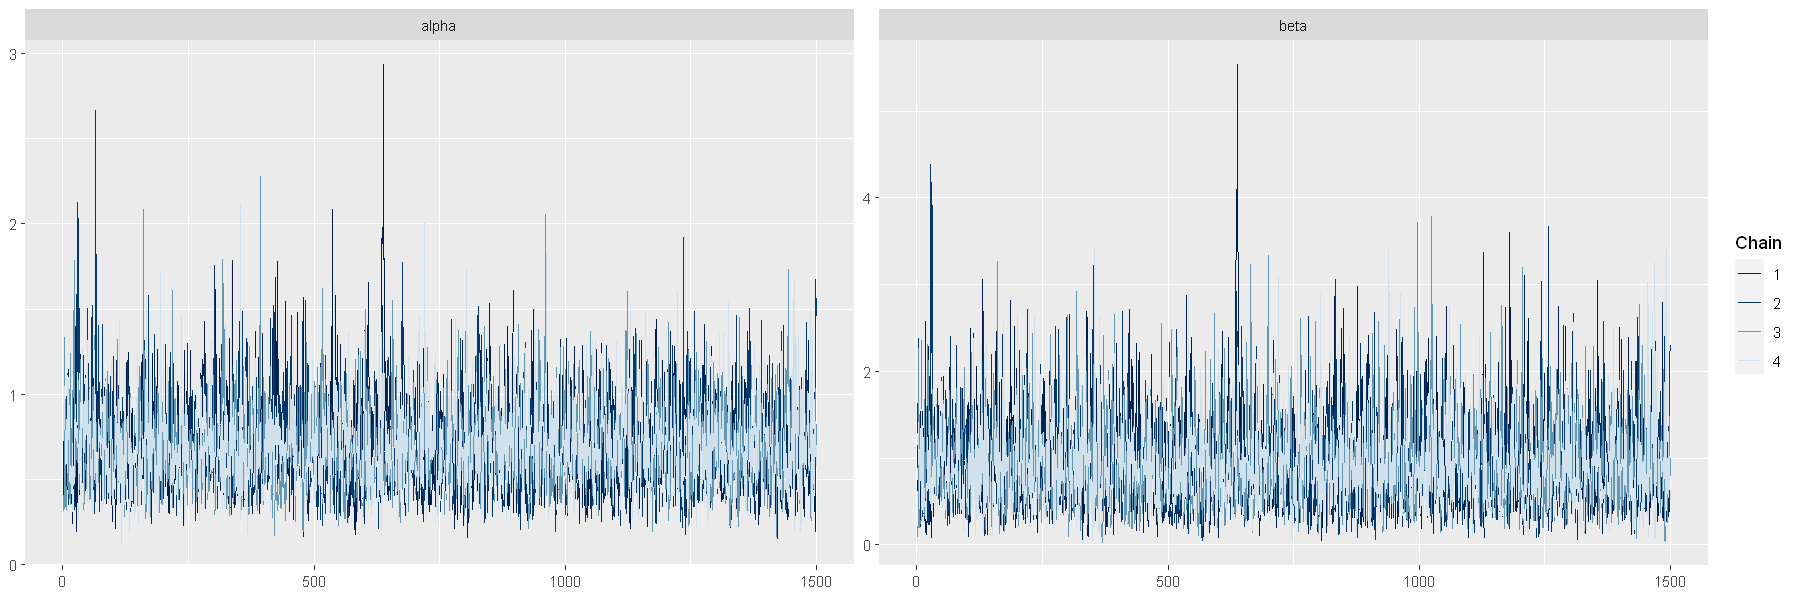

In [43]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_trace(pumps.stanFit,pars=c("alpha","beta"))

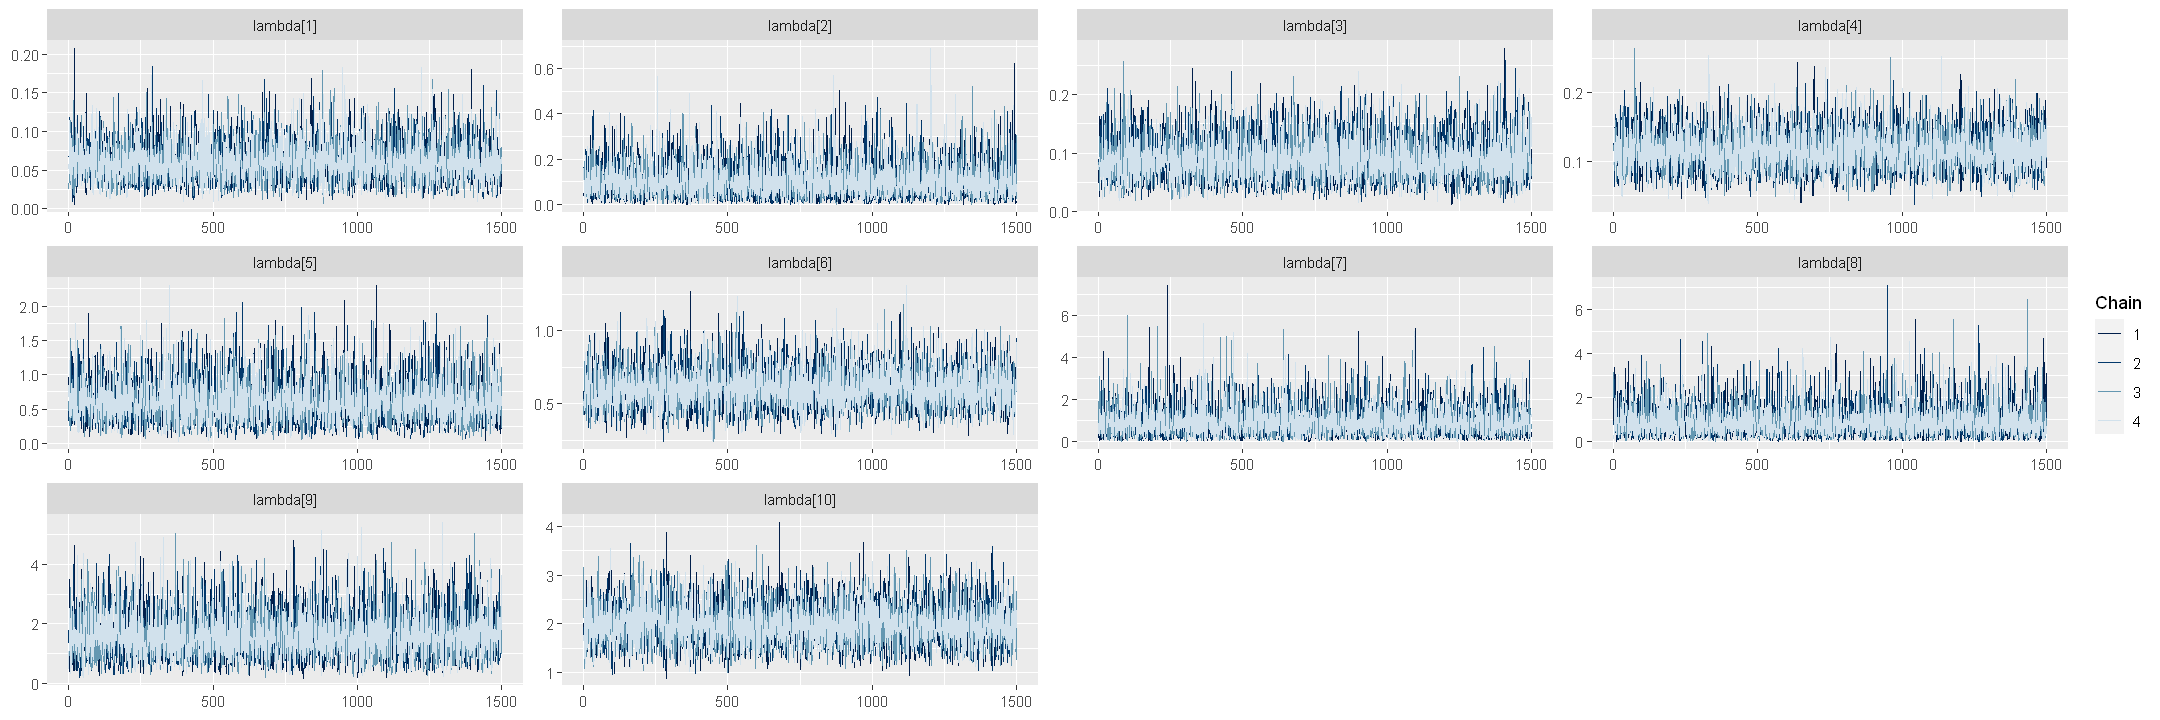

In [44]:
options(repr.plot.width=18,repr.plot.height=6)
mcmc_trace(pumps.stanFit,pars=vars(contains("lambda")))

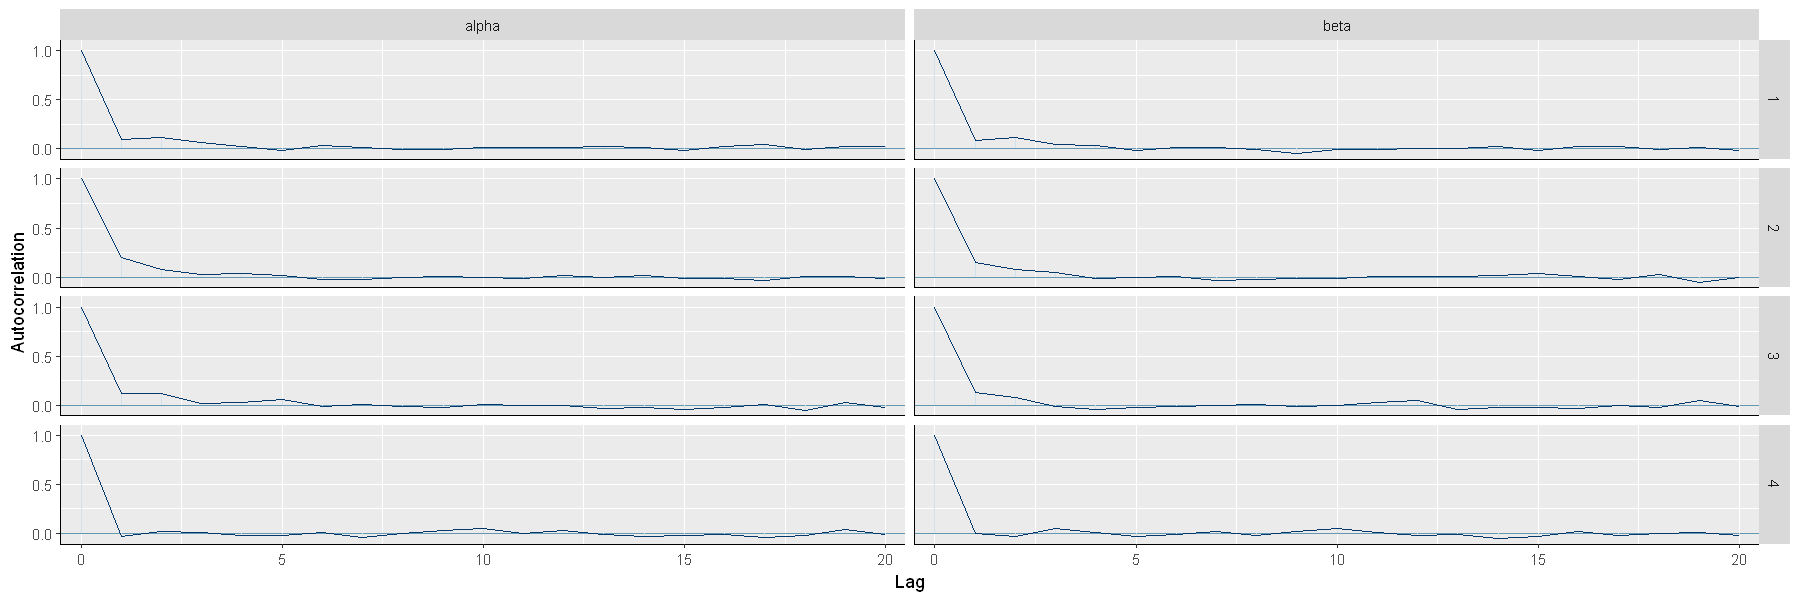

In [45]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_acf(pumps.stanFit,pars=c("alpha","beta"))

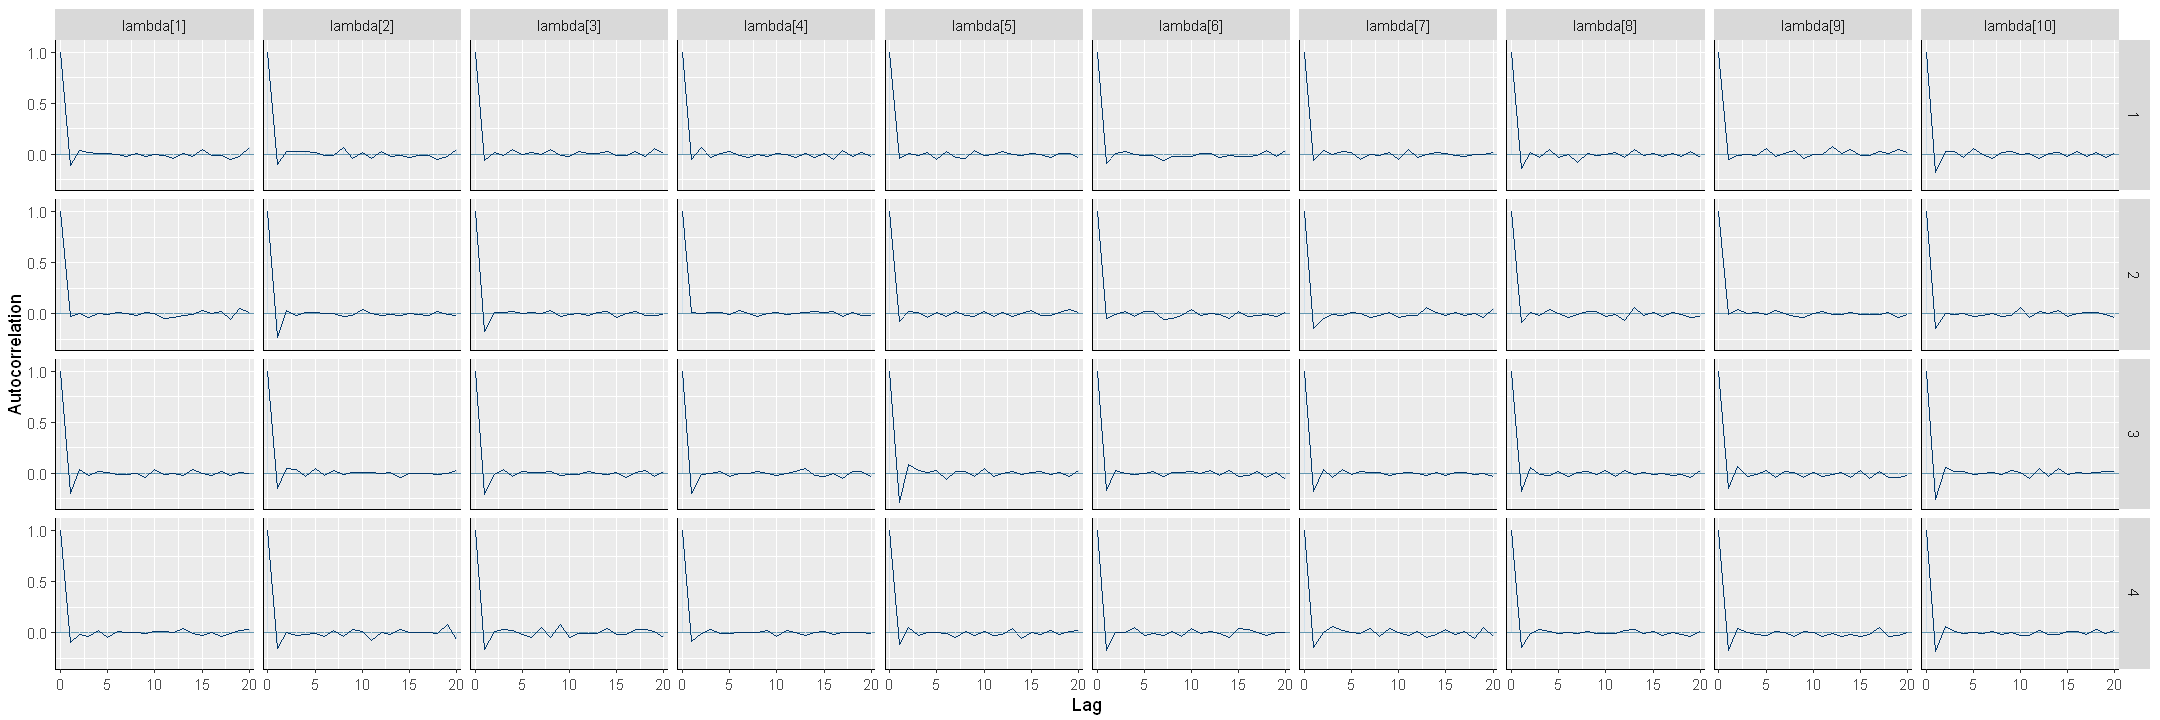

In [46]:
options(repr.plot.width=18,repr.plot.height=6)
mcmc_acf(pumps.stanFit,pars=vars(contains("lambda")))

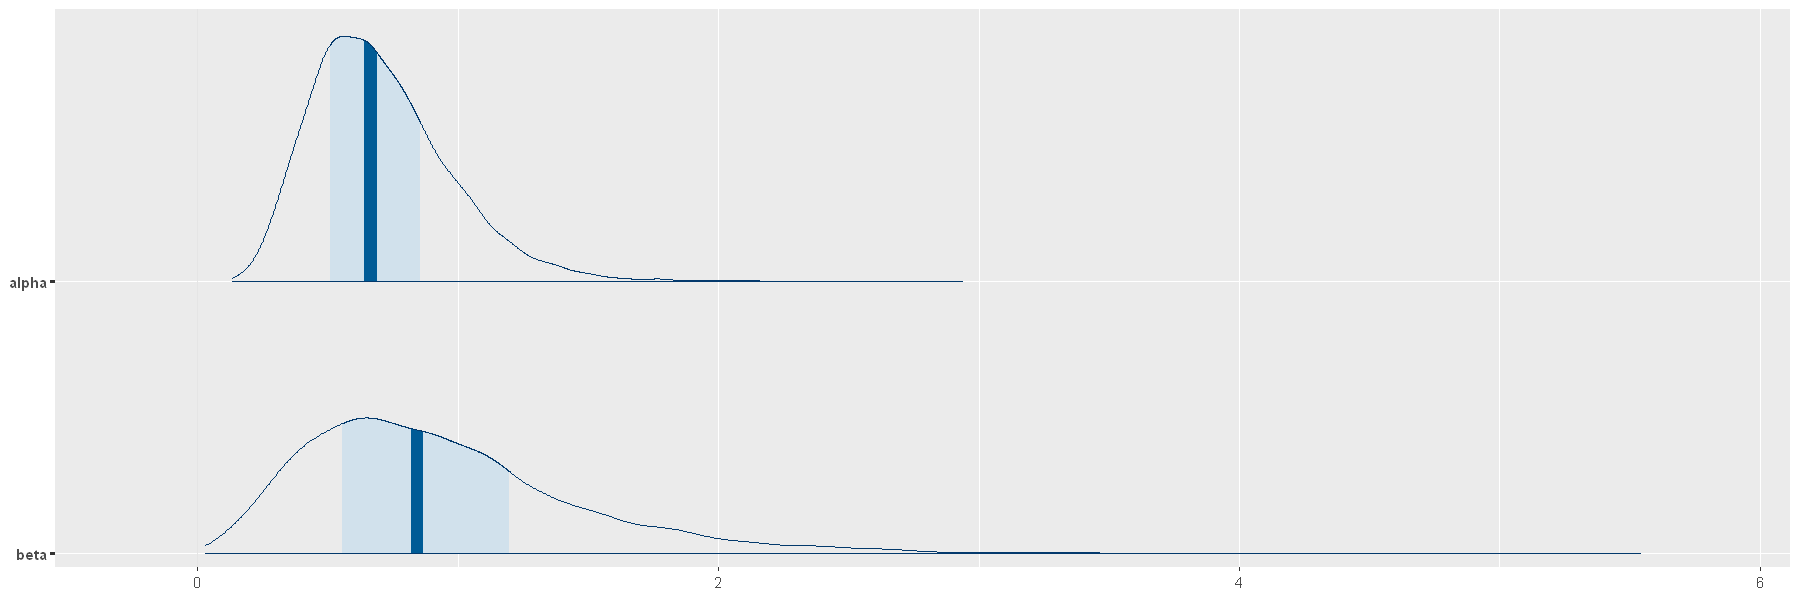

In [47]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_areas(pumps.stanFit,pars=c("alpha","beta"))

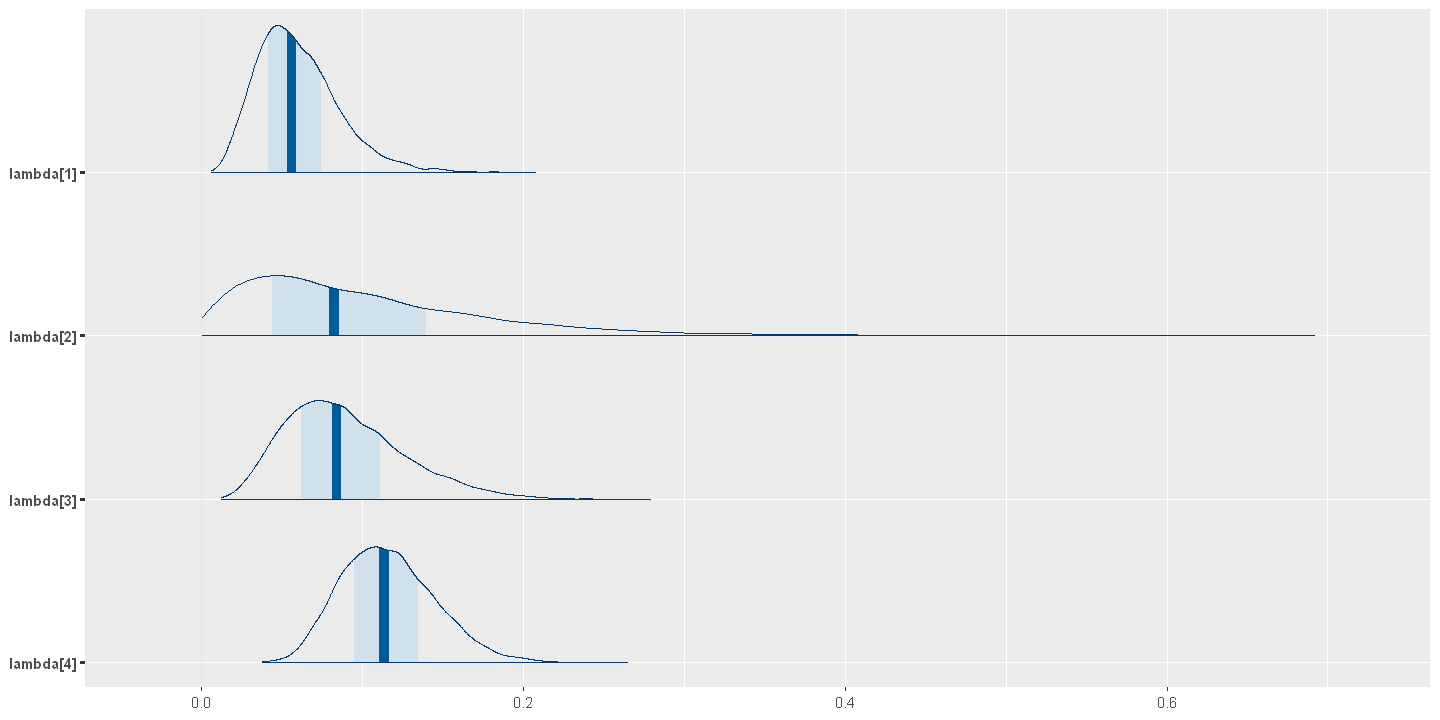

In [48]:
options(repr.plot.width=12,repr.plot.height=6)
mcmc_areas(pumps.stanFit,pars=vars(param_range("lambda",c(1,2,3,4))))

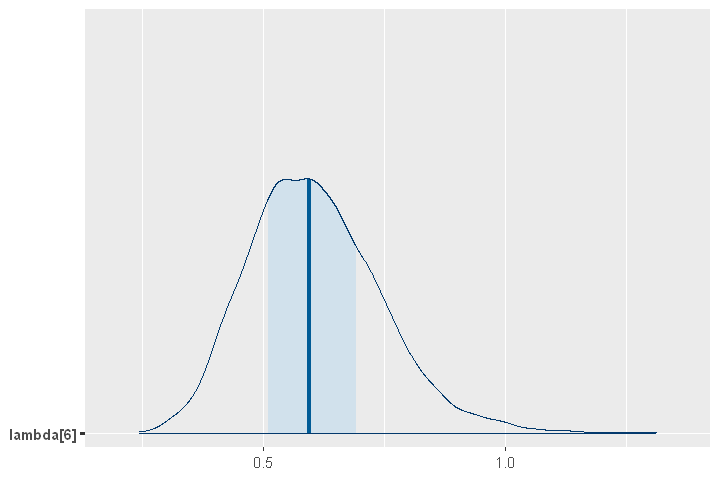

In [49]:
options(repr.plot.width=6,repr.plot.height=4)
mcmc_areas(pumps.stanFit,pars=vars(param_range("lambda",c(6))))

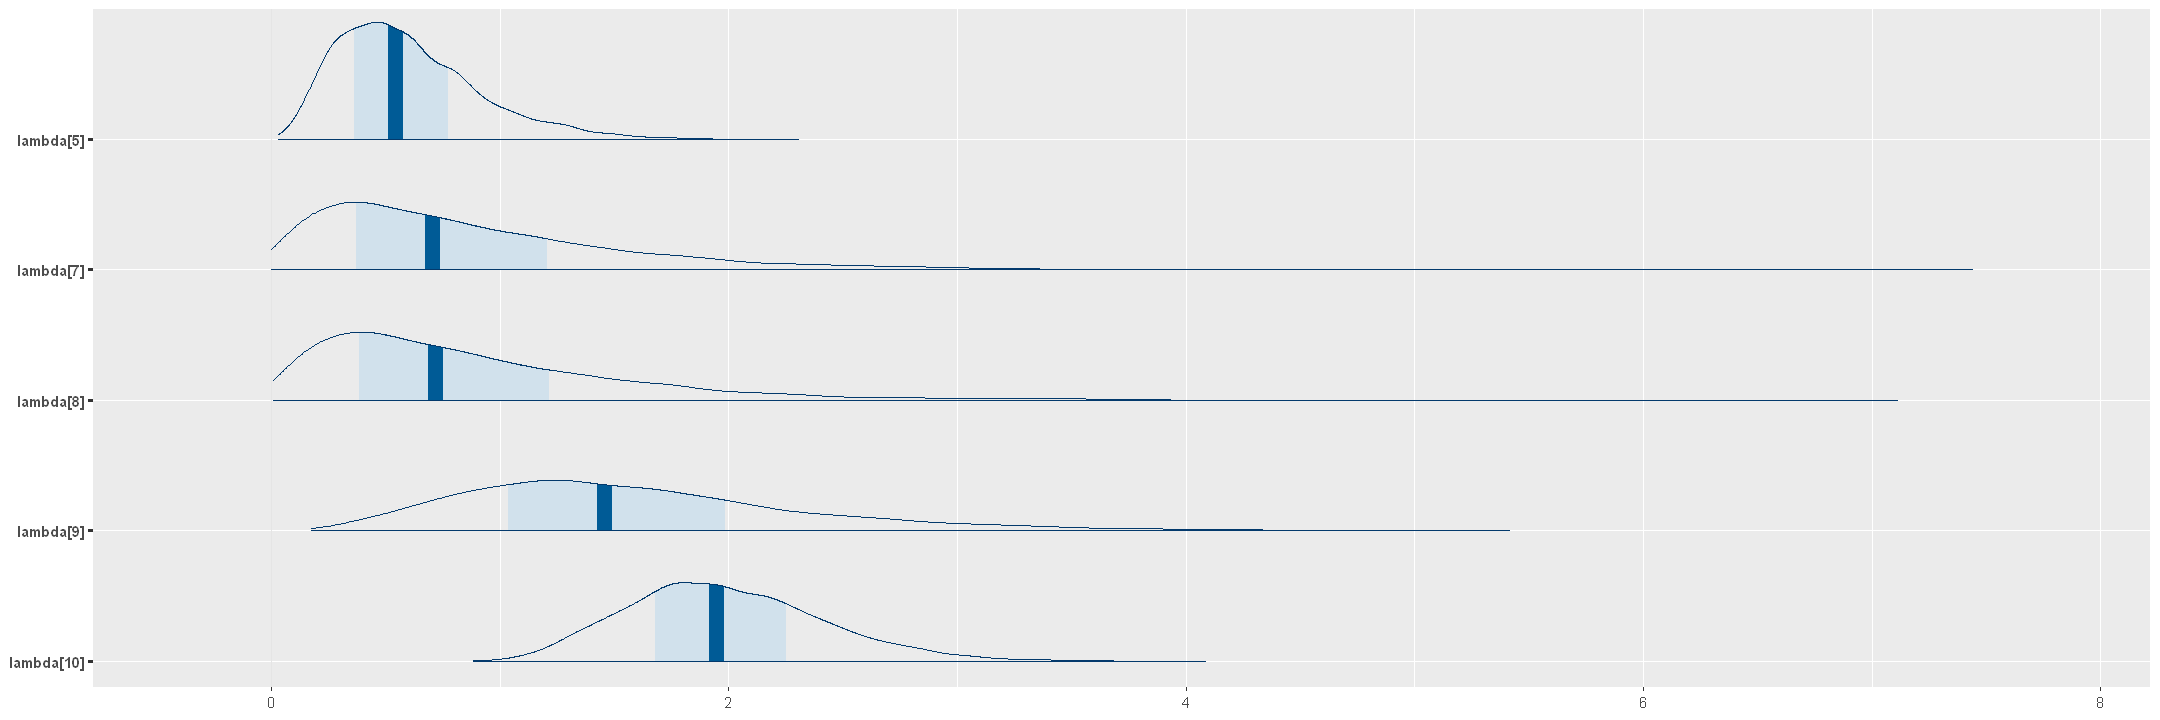

In [50]:
options(repr.plot.width=18,repr.plot.height=6)
mcmc_areas(pumps.stanFit,pars=vars(param_range("lambda",c(5,7,8,9,10))))